In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PHYS 512 - Problem Set 1
Tristan Ménard<br>
260675783
### Problem 1
#### a) 

In [99]:
def fit_truncated_chebyshev(x, y, order1, tol=1e-6):
    
    # Rescale the x domain to -1 <= x <= +1
    xx = np.linspace(-1, 1, len(x))
    
    # Build the Chebyshev polynomial matrix A of order1
    A = np.zeros([len(x), order1+1])
    A[:,0] = 1.0
    if order1 > 0:
        A[:,1] = xx
        for i in range(2, order1+1):
            A[:,i] = 2*xx*A[:,i-1] - A[:,i-2]
    
    # Minimize chi-squared
    # Solve np.dot(A.tranpose(), np.dot(Ninv, A))*m = np.dot(A.transpose(), np.dot(A, y)) for m
    # m are the best fit coefficients for the order1 Chebyshev polynomial
    noise = np.finfo(float).eps # take the noise in each measurement to be the machine precision
    Ninv = np.eye(len(x))/noise**2
    lhs = np.dot(A.transpose(), np.dot(Ninv, A))
    rhs = np.dot(A.transpose(), np.dot(Ninv, y))
    m = np.dot(rhs, np.linalg.inv(lhs))
    
    # Look for coefficients that are larger than the tolerance (=1E-6 by default)
    # nterms is the number of terms to needed to get the accuracy below the tolerance
    nterms = np.sum(np.abs(m) >= tol)
    
    # Truncate the fitted Chebyshev polynomial to order2
#     A_trunc = A[:,:nterms]
#     m_trunc = m[:nterms]
#     fit_trunc = np.dot(A_trunc, m_trunc)
    
    # Find the last coefficient that is larger than the tolerance
    tmp = [i for i in range(len(m)) if np.abs(m[i]) >= tol]
    nterms = np.max(tmp)+1
    A_trunc = A[:,:nterms]
    m_trunc = m[:nterms]
    fit_trunc = np.dot(A_trunc, m_trunc)
    
    return fit_trunc, nterms

Number of terms needed: 8
===== Truncated Chebyshev residuals =====
Max Error: 3.196979381225873e-07
RMS Error: 1.919021821977172e-07
===== Least squares polynomial residuals =====
Max Error: 8.005001208566398e-07
RMS Error: 1.6782509317176955e-07


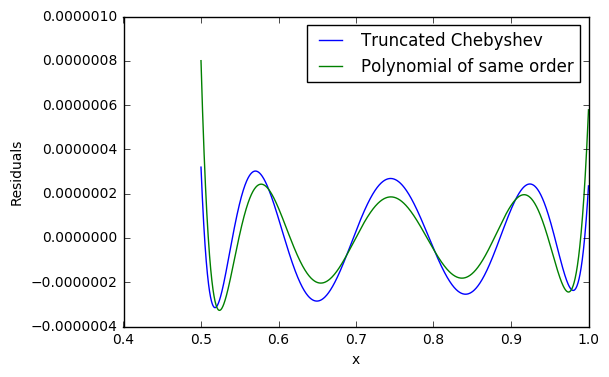

In [101]:
x = np.linspace(0.5,1,2000)
y = np.log2(x)

y_fit_trunc, nterms = fit_truncated_chebyshev(x, y, 15)
print('Number of terms needed: '+repr(nterms))
resid_trunc = y_fit_trunc-y
max_err_trunc = np.max(resid_trunc)
rms_err_trunc = np.sqrt(np.mean(resid_trunc**2))
print('===== Truncated Chebyshev residuals =====\nMax Error: '+repr(max_err_trunc)+'\nRMS Error: '+repr(rms_err_trunc))

p = np.polyfit(x, y, nterms-1)
y_fit_poly = np.polyval(p, x)
resid_poly = y_fit_poly-y
max_err_poly = np.max(resid_poly)
rms_err_poly = np.sqrt(np.mean(resid_poly**2))
print('===== Least squares polynomial residuals =====\nMax Error: '+repr(max_err_poly)+'\nRMS Error: '+repr(rms_err_poly))

plt.plot(x, resid_trunc, label='Truncated Chebyshev')
plt.plot(x, y_fit_poly-y, label='Polynomial of same order')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### b)

Number of terms needed: 55
Max Error: 4.317946089127389e-06


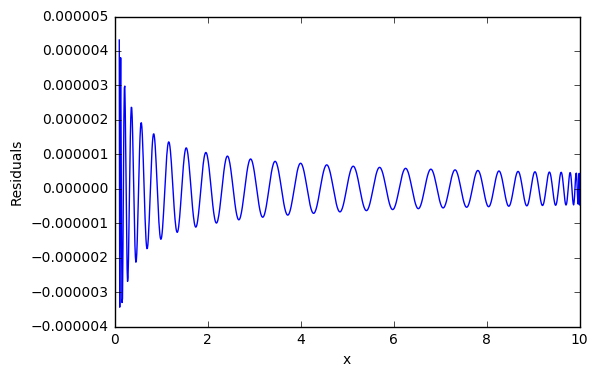

In [127]:
x = np.linspace(0.1,10,1000)
y = np.log2(x)

y_fit_trunc, nterms = fit_truncated_chebyshev(x, y, 100)
print('Number of terms needed: '+repr(nterms))
print('Max Error: '+repr((y_fit_trunc-y).max()))
plt.plot(x, y_fit_trunc-y)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.show()

### Problem 2
#### a)

In [2]:
# Import the data
data = np.loadtxt('229614158_PDCSAP_SC6.txt', delimiter=',', skiprows=1)
time = data[:,0]
flux = data[:,1]

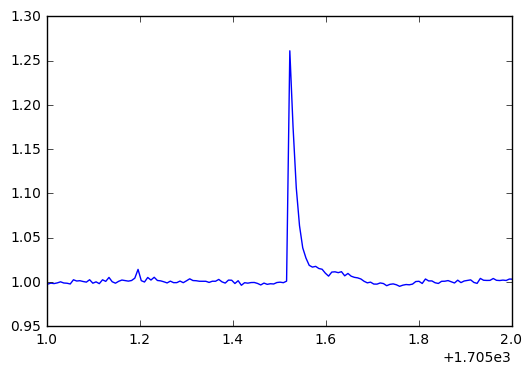

In [7]:
plt.plot(time, flux)
plt.xlim(1706,1707)
plt.show()